## loading data

In [1]:
import pandas as pd
import numpy as np
import sklearn
import os

In [2]:
os.getcwd()

'/Users/rubenstuiver/Documents/WT/assignment2'

In [3]:
df=pd.read_csv('../US_Accidents_June20.csv')
df

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,A-3513776,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,...,False,False,False,False,False,False,Day,Day,Day,Day
3513613,A-3513777,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,...,False,False,False,False,False,False,Day,Day,Day,Day
3513614,A-3513778,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,...,False,False,False,False,False,False,Day,Day,Day,Day
3513615,A-3513779,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.478818e+06,3.513617e+06,3.513617e+06,3.513617e+06,1.034799e+06,1.034799e+06,3.513617e+06,1.250753e+06,3.447885e+06,1.645368e+06,3.443930e+06,3.457735e+06,3.437761e+06,3.059008e+06,1.487743e+06
mean,2.080226e+02,2.339929e+00,3.654195e+01,-9.579151e+01,3.755758e+01,-1.004560e+02,2.816167e-01,5.975383e+03,6.193512e+01,5.355730e+01,6.511427e+01,2.974463e+01,9.122644e+00,8.219025e+00,1.598256e-02
std,2.076627e+01,5.521935e-01,4.883520e+00,1.736877e+01,4.861215e+00,1.852879e+01,1.550134e+00,1.496624e+04,1.862106e+01,2.377334e+01,2.275558e+01,8.319758e-01,2.885879e+00,5.262847e+00,1.928262e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.363784e+01,-1.174418e+02,3.399477e+01,-1.183440e+02,0.000000e+00,8.640000e+02,5.000000e+01,3.570000e+01,4.800000e+01,2.973000e+01,1.000000e+01,5.000000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.591687e+01,-9.102601e+01,3.779736e+01,-9.703438e+01,0.000000e+00,2.798000e+03,6.400000e+01,5.700000e+01,6.700000e+01,2.995000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.032217e+01,-8.093299e+01,4.105139e+01,-8.210168e+01,1.000000e-02,7.098000e+03,7.590000e+01,7.200000e+01,8.400000e+01,3.009000e+01,1.000000e+01,1.150000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,1.706000e+02,1.150000e+02,1.000000e+02,5.774000e+01,1.400000e+02,9.840000e+02,2.500000e+01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

## Cleaning data 

In [6]:
df1=df.copy()

In [7]:
df1=df1.select_dtypes(include=['float64','object','int64'])

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 36 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [9]:
colsdf=['ID',
        'Source',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'Distance(mi)',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Timezone',
 'Temperature(F)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Weather_Condition',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [10]:
df1=df1.loc[:,colsdf]

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   Distance(mi)           float64
 8   Street                 object 
 9   City                   object 
 10  County                 object 
 11  State                  object 
 12  Zipcode                object 
 13  Timezone               object 
 14  Temperature(F)         float64
 15  Visibility(mi)         float64
 16  Wind_Direction         object 
 17  Wind_Speed(mph)        float64
 18  Weather_Condition      object 
 19  Sunrise_Sunset         object 
 20  Civil_Twilight         object 
 21  Nautical_Twilight      object 
 22  Astronomical_Twili

In [12]:
df1['Wind_Speed(mph)'][df1['Wind_Speed(mph)'] >70].sum()/len(df1)

0.0068141746809626666

In [13]:
colsdf1=['ID', 
         'Source',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'Distance(mi)',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Timezone',
 'Temperature(F)',
 'Visibility(mi)',
 'Wind_Direction',
 'Weather_Condition',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   Distance(mi)           float64
 8   Street                 object 
 9   City                   object 
 10  County                 object 
 11  State                  object 
 12  Zipcode                object 
 13  Timezone               object 
 14  Temperature(F)         float64
 15  Visibility(mi)         float64
 16  Wind_Direction         object 
 17  Wind_Speed(mph)        float64
 18  Weather_Condition      object 
 19  Sunrise_Sunset         object 
 20  Civil_Twilight         object 
 21  Nautical_Twilight      object 
 22  Astronomical_Twili

In [15]:
df1=df1.dropna(subset=colsdf1, axis=0)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3409475 entries, 0 to 3513616
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   Distance(mi)           float64
 8   Street                 object 
 9   City                   object 
 10  County                 object 
 11  State                  object 
 12  Zipcode                object 
 13  Timezone               object 
 14  Temperature(F)         float64
 15  Visibility(mi)         float64
 16  Wind_Direction         object 
 17  Wind_Speed(mph)        float64
 18  Weather_Condition      object 
 19  Sunrise_Sunset         object 
 20  Civil_Twilight         object 
 21  Nautical_Twilight      object 
 22  Astronomical_Twili

In [17]:
df1.isnull().sum()

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
Street                        0
City                          0
County                        0
State                         0
Zipcode                       0
Timezone                      0
Temperature(F)                0
Visibility(mi)                0
Wind_Direction                0
Wind_Speed(mph)          376042
Weather_Condition             0
Sunrise_Sunset                0
Civil_Twilight                0
Nautical_Twilight             0
Astronomical_Twilight         0
dtype: int64

In [18]:
df1['Start_Time']=pd.to_datetime(df1['Start_Time'])

In [19]:
df1['End_Time']=pd.to_datetime(df1['End_Time'])

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3409475 entries, 0 to 3513616
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   Distance(mi)           float64       
 8   Street                 object        
 9   City                   object        
 10  County                 object        
 11  State                  object        
 12  Zipcode                object        
 13  Timezone               object        
 14  Temperature(F)         float64       
 15  Visibility(mi)         float64       
 16  Wind_Direction         object        
 17  Wind_Speed(mph)        float64       
 18  Weather_Condition     

In [21]:
df1['Wind_Speed(mph)'].isnull().sum()/len(df1)

0.11029322696309549

In [22]:
df1['Wind_Speed(mph)'].describe()

count    3.033433e+06
mean     8.219152e+00
std      5.245874e+00
min      0.000000e+00
25%      5.000000e+00
50%      7.000000e+00
75%      1.150000e+01
max      9.840000e+02
Name: Wind_Speed(mph), dtype: float64

In [23]:
import seaborn as sns

## Dealing with outliers

In [24]:
# anything above 73 mph is considered a hurricane - drop all values above 100
false_observations = df1['Wind_Speed(mph)'][df1['Wind_Speed(mph)']>100]
false_observations=false_observations.index

In [25]:
df1 = df1.drop(false_observations).reset_index(drop=True)

<AxesSubplot:xlabel='Wind_Speed(mph)'>

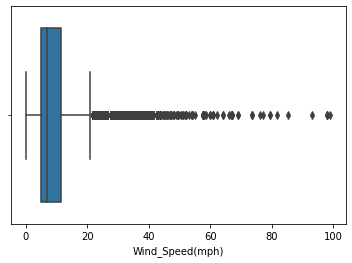

In [26]:
sns.boxplot(data=df1, x='Wind_Speed(mph)')

In [27]:
# impute missing values with median
df1['Wind_Speed(mph)'] = df1['Wind_Speed(mph)'].fillna(df1['Wind_Speed(mph)'].median())

In [28]:
# anything outside -80 & 134 is impossible so remove from df
false_observations_temp_max = df1['Temperature(F)'][df1['Temperature(F)']>134]
false_observations_temp_max =false_observations_temp_max.index

In [29]:
df1 = df1.drop(false_observations_temp_max).reset_index(drop=True)

In [30]:
# anything outside -80 & 134 is impossible so remove from df
false_observations_temp_min = df1['Temperature(F)'][df1['Temperature(F)']<-80]
false_observations_temp_min =false_observations_temp_min.index

In [31]:
df1 = df1.drop(false_observations_temp_min).reset_index(drop=True)

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3409365 entries, 0 to 3409364
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   Distance(mi)           float64       
 8   Street                 object        
 9   City                   object        
 10  County                 object        
 11  State                  object        
 12  Zipcode                object        
 13  Timezone               object        
 14  Temperature(F)         float64       
 15  Visibility(mi)         float64       
 16  Wind_Direction         object        
 17  Wind_Speed(mph)        float64       
 18  Weather_Condition     

<AxesSubplot:xlabel='Distance(mi)'>

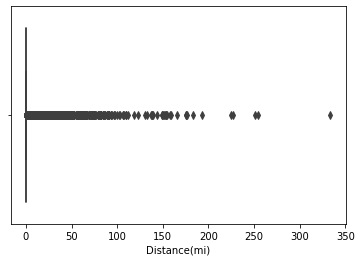

In [33]:
#checking distance for outliers
sns.boxplot(data=df1, x='Distance(mi)')

In [34]:
# no longer traffic jams than 100 miles ever recorded in US - drop all outliers
false_obs_distance = df1['Distance(mi)'][df1['Distance(mi)']>100]
false_obs_distance = false_obs_distance.index

In [35]:
df1 = df1.drop(false_obs_distance).reset_index(drop=True)

<AxesSubplot:xlabel='Distance(mi)'>

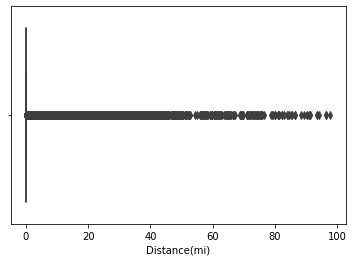

In [36]:
sns.boxplot(data=df1, x='Distance(mi)')

<AxesSubplot:xlabel='Visibility(mi)'>

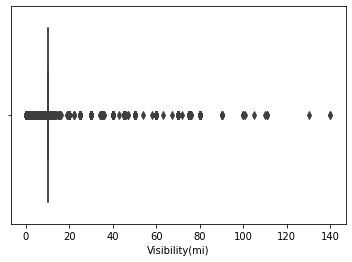

In [37]:
sns.boxplot(data=df1, x='Visibility(mi)')

## drop duplicates

In [38]:
df1.dropna(inplace=True)

In [39]:
df1.drop_duplicates()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,...,Timezone,Temperature(F),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.010,I-70 E,Dayton,...,US/Eastern,36.9,10.0,Calm,7.0,Light Rain,Night,Night,Night,Night
1,A-2,MapQuest,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.010,Brice Rd,Reynoldsburg,...,US/Eastern,37.9,10.0,Calm,7.0,Light Rain,Night,Night,Night,Day
2,A-3,MapQuest,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.010,State Route 32,Williamsburg,...,US/Eastern,36.0,10.0,SW,3.5,Overcast,Night,Night,Day,Day
3,A-4,MapQuest,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.010,I-75 S,Dayton,...,US/Eastern,35.1,9.0,SW,4.6,Mostly Cloudy,Night,Day,Day,Day
4,A-5,MapQuest,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.010,Miamisburg Centerville Rd,Dayton,...,US/Eastern,36.0,6.0,SW,3.5,Mostly Cloudy,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3409320,A-3513776,Bing,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,0.543,Pomona Fwy E,Riverside,...,US/Pacific,86.0,10.0,W,13.0,Fair,Day,Day,Day,Day
3409321,A-3513777,Bing,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,0.338,I-8 W,San Diego,...,US/Pacific,70.0,10.0,SW,6.0,Fair,Day,Day,Day,Day
3409322,A-3513778,Bing,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,0.561,Garden Grove Fwy,Orange,...,US/Pacific,73.0,10.0,SSW,10.0,Partly Cloudy,Day,Day,Day,Day
3409323,A-3513779,Bing,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,0.772,San Diego Fwy S,Culver City,...,US/Pacific,71.0,10.0,SW,8.0,Fair,Day,Day,Day,Day


In [40]:
## note : check if we need to do IQR later on

## Dealing with strings

In [41]:
#stripping all strings (objects)
df1["Street"] = df1["Street"].map(str.strip)
df1["Source"] = df1["Source"].map(str.strip)
df1["City"] = df1["City"].map(str.strip)
df1["County"] = df1["County"].map(str.strip)
df1["State"] = df1["State"].map(str.strip)
df1["Zipcode"] = df1["Zipcode"].map(str.strip)
df1["Timezone"] = df1["Timezone"].map(str.strip)
df1["Wind_Direction"] = df1["Wind_Direction"].map(str.strip)
df1["Nautical_Twilight"] = df1["Nautical_Twilight"].map(str.strip)
df1["Sunrise_Sunset"] = df1["Sunrise_Sunset"].map(str.strip)
df1["Weather_Condition"] = df1["Weather_Condition"].map(str.strip)
df1["Civil_Twilight"] = df1["Civil_Twilight"].map(str.strip)
df1["Astronomical_Twilight"] = df1["Astronomical_Twilight"].map(str.strip)
df1["ID"] = df1["ID"].map(str.strip)

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3409325 entries, 0 to 3409324
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   Distance(mi)           float64       
 8   Street                 object        
 9   City                   object        
 10  County                 object        
 11  State                  object        
 12  Zipcode                object        
 13  Timezone               object        
 14  Temperature(F)         float64       
 15  Visibility(mi)         float64       
 16  Wind_Direction         object        
 17  Wind_Speed(mph)        float64       
 18  Weather_Condition     

In [43]:
## Dealing with wind_direction values
df1['Wind_Direction'].unique()

array(['Calm', 'SW', 'SSW', 'WSW', 'WNW', 'NW', 'West', 'NNW', 'NNE',
       'South', 'North', 'Variable', 'SE', 'SSE', 'ESE', 'East', 'NE',
       'ENE', 'E', 'W', 'S', 'VAR', 'CALM', 'N'], dtype=object)

In [44]:
df1.replace(to_replace='N', value='North', inplace=True)
df1.replace(to_replace='E', value='East', inplace=True)
df1.replace(to_replace='S', value='South', inplace=True)
df1.replace(to_replace='W', value='West', inplace=True)
df1.replace(to_replace='VAR', value='Variable', inplace=True)
df1.replace(to_replace='CALM', value='Calm', inplace=True)

In [45]:
df1['Wind_Direction'].unique()

array(['Calm', 'SW', 'SSW', 'WSW', 'WNW', 'NW', 'West', 'NNW', 'NNE',
       'South', 'North', 'Variable', 'SE', 'SSE', 'ESE', 'East', 'NE',
       'ENE'], dtype=object)

In [46]:
lower_cols=df1.select_dtypes(include=['object']).columns
lower_cols

Index(['ID', 'Source', 'Street', 'City', 'County', 'State', 'Zipcode',
       'Timezone', 'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [47]:
df1[lower_cols]=df1[lower_cols].apply(lambda x: x.astype(str).str.lower())

In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3409325 entries, 0 to 3409324
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   Distance(mi)           float64       
 8   Street                 object        
 9   City                   object        
 10  County                 object        
 11  State                  object        
 12  Zipcode                object        
 13  Timezone               object        
 14  Temperature(F)         float64       
 15  Visibility(mi)         float64       
 16  Wind_Direction         object        
 17  Wind_Speed(mph)        float64       
 18  Weather_Condition     

In [49]:
df1.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,...,Timezone,Temperature(F),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,a-1,mapquest,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,i-70 e,dayton,...,us/eastern,36.9,10.0,calm,7.0,light rain,night,night,night,night
1,a-2,mapquest,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,brice rd,reynoldsburg,...,us/eastern,37.9,10.0,calm,7.0,light rain,night,night,night,day
2,a-3,mapquest,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,state route 32,williamsburg,...,us/eastern,36.0,10.0,sw,3.5,overcast,night,night,day,day
3,a-4,mapquest,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,i-75 s,dayton,...,us/eastern,35.1,9.0,sw,4.6,mostly cloudy,night,day,day,day
4,a-5,mapquest,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,miamisburg centerville rd,dayton,...,us/eastern,36.0,6.0,sw,3.5,mostly cloudy,day,day,day,day


In [50]:
# replace all types containing 'thunder' to just thunder
df1.loc[df1['Weather_Condition'].str.contains('Thunder'), 'Weather_Condition'] = 'thunder'
df1.loc[df1['Weather_Condition'].str.contains('thunder'), 'Weather_Condition'] = 'thunder'
df1.loc[df1['Weather_Condition'].str.contains('t-'), 'Weather_Condition'] = 'thunder'
df1.loc[df1['Weather_Condition'].str.contains('snow'), 'Weather_Condition'] = 'snow'
# replace all rain types to light, rain or heavy rain
df1.loc[df1['Weather_Condition'].str.contains('light freezing rain'), 'Weather_Condition'] = 'light rain'
df1.loc[df1['Weather_Condition'].str.contains('light rain showers'), 'Weather_Condition'] = 'light rain'
df1.loc[df1['Weather_Condition'].str.contains('rain showers'), 'Weather_Condition'] = 'rain'
df1.loc[df1['Weather_Condition'].str.contains('light rain / windy'), 'Weather_Condition'] = 'light rain'
df1.loc[df1['Weather_Condition'].str.contains('light rain shower'), 'Weather_Condition'] = 'light rain'
df1.loc[df1['Weather_Condition'].str.contains('light rain / windy'), 'Weather_Condition'] = 'light rain'
df1.loc[df1['Weather_Condition'].str.contains('heavy freezing rain'), 'Weather_Condition'] = 'heavy rain'
df1.loc[df1['Weather_Condition'].str.contains('heavy rain shower'), 'Weather_Condition'] = 'heavy rain'
df1.loc[df1['Weather_Condition'].str.contains('freezing rain / windy'), 'Weather_Condition'] = 'rain'
df1.loc[df1['Weather_Condition'].str.contains('rain and sleet'), 'Weather_Condition'] = 'rain'
df1.loc[df1['Weather_Condition'].str.contains('freezing rain'), 'Weather_Condition'] = 'rain'
df1.loc[df1['Weather_Condition'].str.contains('light rain shower / windy'), 'Weather_Condition'] = 'light rain'
df1.loc[df1['Weather_Condition'].str.contains('rain shower'), 'Weather_Condition'] = 'rain'
df1.loc[df1['Weather_Condition'].str.contains('rain / windy'), 'Weather_Condition'] = 'rain'
df1.loc[df1['Weather_Condition'].str.contains('heavy rain / windy'), 'Weather_Condition'] = 'heavy rain'
# dealing with drizzle types 
df1.loc[df1['Weather_Condition'].str.contains('drizzle'), 'Weather_Condition'] = 'drizzle'
# dealing with cloudy 
df1.loc[df1['Weather_Condition'].str.contains('scattered clouds'), 'Weather_Condition'] = 'partly cloudy'
df1.loc[df1['Weather_Condition'].str.contains('mostly cloudy'), 'Weather_Condition'] = 'cloudy'
df1.loc[df1['Weather_Condition'].str.contains('mostly cloudy / windy'), 'Weather_Condition'] = 'cloudy'
df1.loc[df1['Weather_Condition'].str.contains('partly cloudy / windy'), 'Weather_Condition'] = 'partly cloudy'
df1.loc[df1['Weather_Condition'].str.contains('funnel cloud'), 'Weather_Condition'] = 'cloudy'
df1.loc[df1['Weather_Condition'].str.contains('cloudy / windy'), 'Weather_Condition'] = 'cloudy'
# dealing with fair, fog, squalls, wintry mix 
df1.loc[df1['Weather_Condition'].str.contains('fair'), 'Weather_Condition'] = 'fair'
df1.loc[df1['Weather_Condition'].str.contains('mist'), 'Weather_Condition'] = 'fog'
df1.loc[df1['Weather_Condition'].str.contains('squalls'), 'Weather_Condition'] = 'squalls'
df1.loc[df1['Weather_Condition'].str.contains('wintry mix'), 'Weather_Condition'] = 'wintry mix'
#dealing with haze
df1.loc[df1['Weather_Condition'].str.contains('haze'), 'Weather_Condition'] = 'haze'
# dealing with sand and dust 
df1.loc[df1['Weather_Condition'].str.contains('sand'), 'Weather_Condition'] = 'sand/dust'
df1.loc[df1['Weather_Condition'].str.contains('dust'), 'Weather_Condition'] = 'sand/dust'
# dealing with hail 
df1.loc[df1['Weather_Condition'].str.contains('hail'), 'Weather_Condition'] = 'hail'
# dealing with fog
df1.loc[df1['Weather_Condition'].str.contains('fog'), 'Weather_Condition'] = 'fog'

In [51]:
#remove all values that have less than 0.1%
toremovefromweather=list(df1['Weather_Condition'].value_counts().tail(17).index)

In [52]:
df1 = df1[df1.Weather_Condition.isin(toremovefromweather) == False]

In [53]:
df1['Weather_Condition'].nunique()

13

## Engineering extra columns

In [54]:
# durationg time 
df1['duration_time']=df1['End_Time']-df1['Start_Time']

In [55]:
# dealing with severity columns
severity_is_one = lambda x: int(x==1)
severity_is_two = lambda x: int(x==2)
severity_is_three = lambda x: int(x==3)
severity_is_four = lambda x: int(x==4)

df1["severity_is_one"] = df1["Severity"].map(severity_is_one) # --> Series([0, 1, 1, 0, 0, 1 ...])
df1["severity_is_two"] = df1["Severity"].map(severity_is_two) # --> Series([0, 1, 1, 0, 0, 1 ...])
df1["severity_is_three"] = df1["Severity"].map(severity_is_three) # --> Series([0, 1, 1, 0, 0, 1 ...])
df1["severity_is_four"] = df1["Severity"].map(severity_is_four) # --> Series([0, 1, 1, 0, 0, 1 ...])

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3402319 entries, 0 to 3409324
Data columns (total 28 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   ID                     object         
 1   Source                 object         
 2   Severity               int64          
 3   Start_Time             datetime64[ns] 
 4   End_Time               datetime64[ns] 
 5   Start_Lat              float64        
 6   Start_Lng              float64        
 7   Distance(mi)           float64        
 8   Street                 object         
 9   City                   object         
 10  County                 object         
 11  State                  object         
 12  Zipcode                object         
 13  Timezone               object         
 14  Temperature(F)         float64        
 15  Visibility(mi)         float64        
 16  Wind_Direction         object         
 17  Wind_Speed(mph)        float64        
 18  We

## plotting 

In [57]:
# Import Modules 
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
# for variable in df1.select_dtypes(exclude = ["object"]).columns:
#     print(f"----- Distribution of {variable} : -----")
#     sns.histplot(df1[variable])
#     plt.show()

In [86]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3402319 entries, 0 to 3409324
Data columns (total 28 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   ID                     object         
 1   Source                 object         
 2   Severity               int64          
 3   Start_Time             datetime64[ns] 
 4   End_Time               datetime64[ns] 
 5   Start_Lat              float64        
 6   Start_Lng              float64        
 7   Distance(mi)           float64        
 8   Street                 object         
 9   City                   object         
 10  County                 object         
 11  State                  object         
 12  Zipcode                object         
 13  Timezone               object         
 14  Temperature(F)         float64        
 15  Visibility(mi)         float64        
 16  Wind_Direction         object         
 17  Wind_Speed(mph)        float64        
 18  We

<AxesSubplot:>

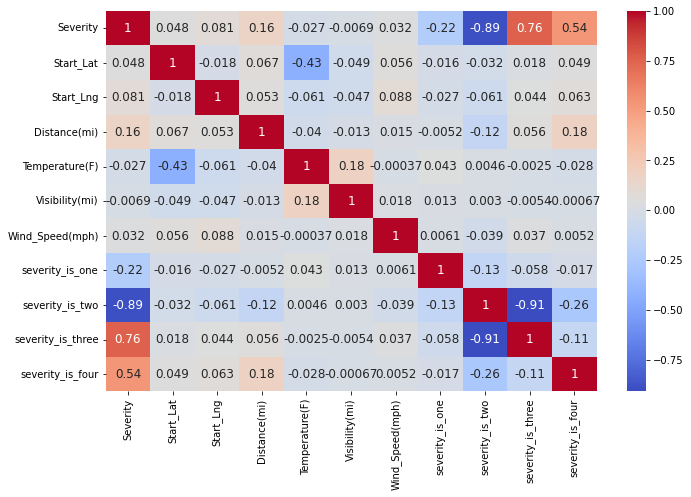

In [88]:
# Correlation plot 
plt.figure(figsize=(11,7))
sns.heatmap(df1.corr(), cmap='coolwarm', annot = True, annot_kws={"size": 12})

In [89]:
round(np.abs(df1.corr()['Distance(mi)']).sort_values(ascending = False),2)

Distance(mi)         1.00
severity_is_four     0.18
Severity             0.16
severity_is_two      0.12
Start_Lat            0.07
severity_is_three    0.06
Start_Lng            0.05
Temperature(F)       0.04
Wind_Speed(mph)      0.02
Visibility(mi)       0.01
severity_is_one      0.01
Name: Distance(mi), dtype: float64

In [90]:
#rename columns
df1.rename(columns = {'Temperature(F)':'Temperature'}, inplace = True)

In [91]:
#rename columns
df1.rename(columns = {'Visibility(mi)':'Visibility'}, inplace = True)

In [ ]:
#facegrid of severity against temperature
g = sns.FacetGrid(data=df1, col="Severity")
g.map(plt.hist,"Temperature")

(-20.0, 62.991479482055944)

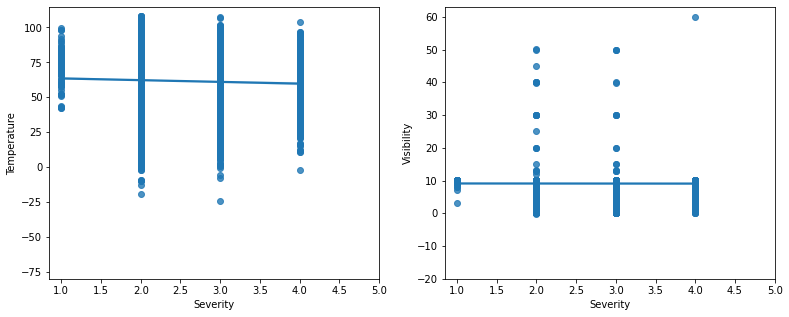

In [92]:
## running some regressions
sample = df1.sample(10000, random_state=42)

plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
sns.regplot(x = sample.Severity, y= sample.Temperature, y_jitter=.1)
plt.xlim(right=5)
plt.ylim(bottom=-80)

plt.subplot(1,2,2)
sns.regplot(x = sample.Severity, y= sample.Visibility, y_jitter=.1)
plt.xlim(right=5)
plt.ylim(bottom=-20)

<AxesSubplot:xlabel='State'>

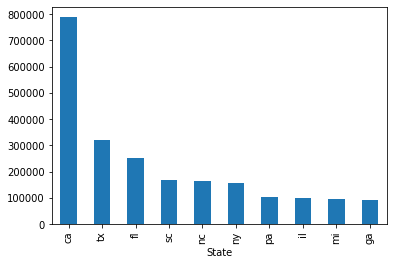

In [93]:
## top 10 states with most accidents
(df1.groupby('State')['ID'].count().sort_values(ascending=False)).head(10).plot(kind='bar')

<AxesSubplot:xlabel='State'>

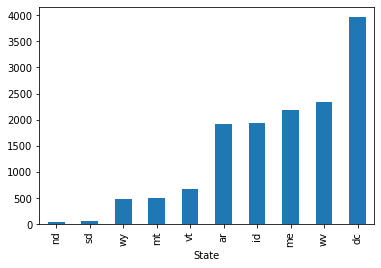

In [94]:
## top 10 states with least accidents
(df1.groupby('State')['ID'].count().sort_values(ascending=True)).head(10).plot(kind='bar')

<AxesSubplot:xlabel='Severity'>

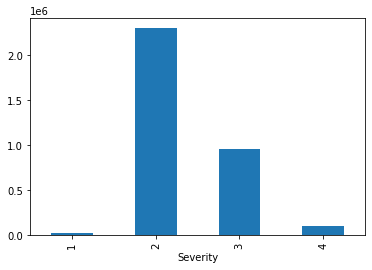

In [95]:
df1.groupby('Severity')['ID'].count().plot(kind='bar')

<AxesSubplot:xlabel='Weather_Condition'>

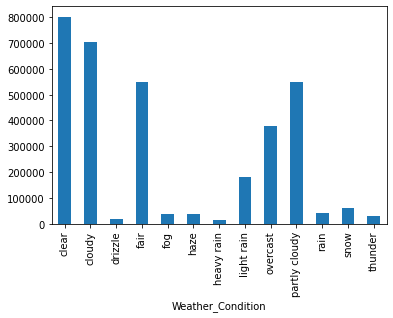

In [96]:
#Weather types with their counts of accidents
df1.groupby('Weather_Condition')['ID'].count().plot(kind='bar')

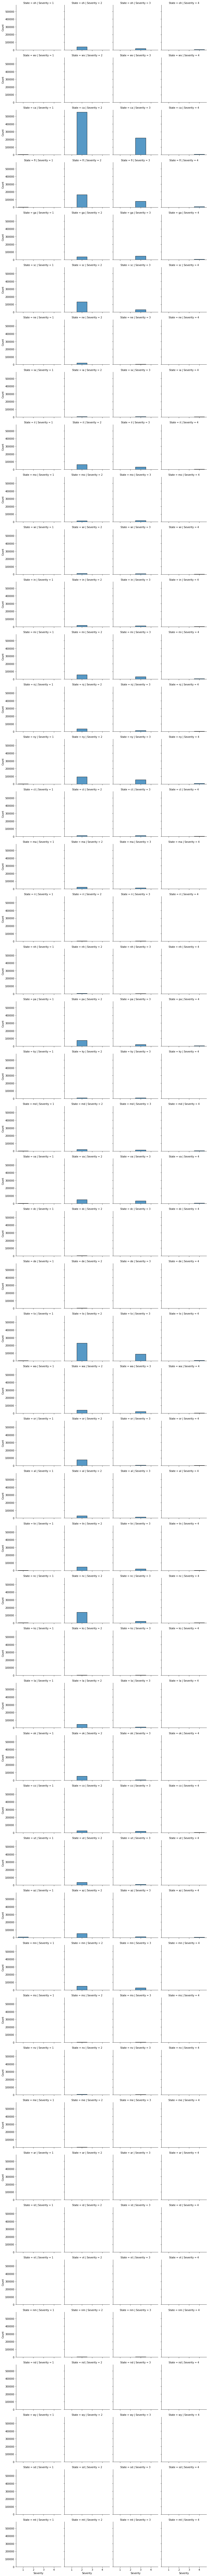

In [97]:
#group by state, show the severity count per state
g = sns.FacetGrid(data=df1, col='Severity', row='State')
g.map(sns.histplot, 'Severity')

In [98]:
# index by date and oranize what time the most accidents happen
df1.set_index('Start_Time', inplace=True)

<AxesSubplot:xlabel='Start_Time'>

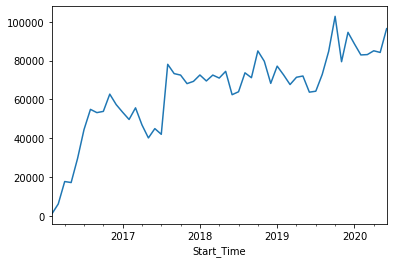

In [99]:
# increase in accidents on monthly base
df1.ID.resample('M').count().plot()

#NOTE: it seems that there is a huge increase; lets take a look per source

In [102]:
mapquest_df=df1[df1['Source']=='mapquest']
mapquestbing_df=df1[df1['Source']=='mapquest-bing']
bing_df=df1[df1['Source']=='bing']

In [ ]:
mapquest_df.set_index('Start_Time', inplace=True)
mapquestbing_df.set_index('Start_Time', inplace=True)
bing_df.set_index('Start_Time', inplace=True)

In [106]:
mapquest_df.head()

,ID,Source,Severity,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,...,Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,duration_time,severity_is_one,severity_is_two,severity_is_three,severity_is_four
Start_Time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,a-1,mapquest,3,2016-02-08 11:00:00,39.865147,-84.058723,0.01,i-70 e,dayton,montgomery,...,light rain,night,night,night,night,0 days 05:14:00,0,0,1,0
2016-02-08 06:07:59,a-2,mapquest,2,2016-02-08 06:37:59,39.928059,-82.831184,0.01,brice rd,reynoldsburg,franklin,...,light rain,night,night,night,day,0 days 00:30:00,0,1,0,0
2016-02-08 06:49:27,a-3,mapquest,2,2016-02-08 07:19:27,39.063148,-84.032608,0.01,state route 32,williamsburg,clermont,...,overcast,night,night,day,day,0 days 00:30:00,0,1,0,0
2016-02-08 07:23:34,a-4,mapquest,3,2016-02-08 07:53:34,39.747753,-84.205582,0.01,i-75 s,dayton,montgomery,...,cloudy,night,day,day,day,0 days 00:30:00,0,0,1,0
2016-02-08 07:39:07,a-5,mapquest,2,2016-02-08 08:09:07,39.627781,-84.188354,0.01,miamisburg centerville rd,dayton,montgomery,...,cloudy,day,day,day,day,0 days 00:30:00,0,1,0,0


<AxesSubplot:xlabel='Start_Time'>

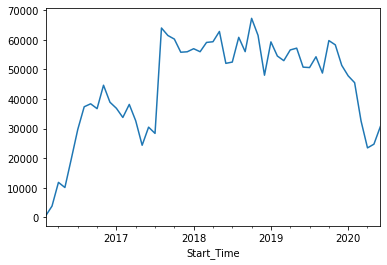

In [107]:
#source = mapquest
mapquest_df.ID.resample('M').count().plot()

<AxesSubplot:xlabel='Start_Time'>

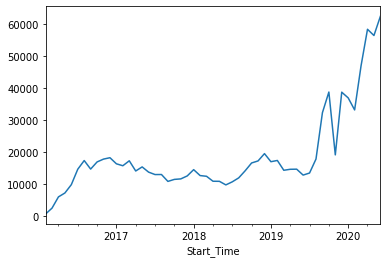

In [108]:
#source = bing
bing_df.ID.resample('M').count().plot()

<AxesSubplot:xlabel='Start_Time'>

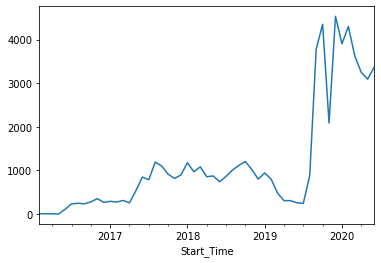

In [109]:
#source = mapquest-bing
mapquestbing_df.ID.resample('M').count().plot()

In [111]:
## still the numbers in 2016 are very low - this could be due to the API being used / updated less frequently

In [ ]:
### below is trial stuff


In [ ]:
# location wise, where do the most accidents happen?

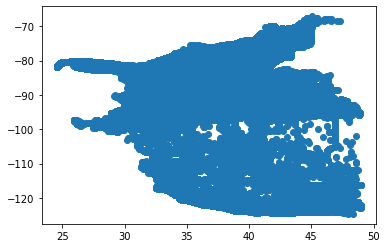

In [133]:

import matplotlib.pyplot as plt

plt.scatter(x=df1['Start_Lat'], y=df1['Start_Lng'])
plt.rcParams['figure.figsize']=(50,35)
plt.show()

In [135]:
import plotly.graph_objects as go

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_us_cities.csv')
df.head()

df['text'] = df['name'] + '<br>Population ' + (df['pop']/1e6).astype(str)+' million'
limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]
cities = []
scale = 5000

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['lon'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['pop']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = '2014 US city populations<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

ValueError: Value of 'size' is not the name of a column in 'data_frame'. Expected one of ['ID', 'Source', 'Severity', 'End_Time', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Street', 'City', 'County', 'State', 'Zipcode', 'Timezone', 'Temperature', 'Visibility', 'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'duration_time', 'severity_is_one', 'severity_is_two', 'severity_is_three', 'severity_is_four'] but received: pop